In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use("ggplot")

from google.colab import drive
drive.mount("/content/drive", force_remount=True)
import os, sys


local = '/content/drive/MyDrive/8º Semestre/Séries temporais'
arquivo = 'series.csv'

# define o diretório de trabalho no drive
os.chdir(local)

# Base de dados atual
df = pd.read_csv(arquivo, sep=',', index_col=0)
df.head()

Mounted at /content/drive


,code,name,theme,source,freq,lastupdate,status
1,ABPO12_PAPEL12,"Papelão ondulado - expedição de caixas, acessó...",Macroeconomic,ABPO,Monthly,2023-09-04,Active
2,ACSP12_INAD12,Inadimplência - índice em t-3,Macroeconomic,ACSP/IEGV,Monthly,2019-08-27,Inactive
3,ACSP12_INADI12,Inadimplência - índice em t-4,Macroeconomic,ACSP/IEGV,Monthly,2016-11-08,Inactive
4,ACSP12_SCPCC12,SPC - número de consultas,Macroeconomic,ACSP/IEGV,Monthly,2022-12-01,Inactive
5,ACSP12_SCPCRC12,SPC - número de registros cancelados,Macroeconomic,ACSP/IEGV,Monthly,2016-02-23,Inactive


###Geral

In [ ]:
df.columns

Index(['code', 'name', 'theme', 'source', 'freq', 'lastupdate', 'status'], dtype='object')

In [ ]:
df.status.value_counts()

Active      4207
Inactive    3331
Name: status, dtype: int64

In [ ]:
df.freq.value_counts(normalize=True)

Monthly           0.383470
Yearly            0.351827
Quarterly         0.101801
Quadrennial       0.073072
Decennial         0.069741
Irregular         0.008327
Daily             0.004892
Quinquennial      0.003539
Not applicable    0.003331
Name: freq, dtype: float64

In [ ]:
df.theme.value_counts()

Macroeconomic    7538
Regional         1362
Social            707
Name: theme, dtype: int64

In [ ]:
df.source.value_counts()[0:10]

IPEA                            774
TSE                             702
IPEA/ADH Censo IBGE             548
MDIC/SECEX Países               504
Funcex                          476
FMI/WEO                         468
IBGE                            420
FMI/IFS                         415
Bacen/Notas Imprensa/F. Púb.    392
Bacen/BP (BPM5)                 378
Name: source, dtype: int64

In [ ]:
df.source.value_counts()

IPEA                   774
TSE                    702
IPEA/ADH Censo IBGE    548
MDIC/SECEX Países      504
Funcex                 476
                      ... 
RFFSA                    1
JP Morgan                1
Fundap/Diesp             1
Abia                     1
ABPO                     1
Name: source, Length: 114, dtype: int64

##Usando a Biblioteca

In [ ]:
!pip install ipeadatapy
import ipeadatapy as ip

###Específicos

####IGP_INCCG

In [ ]:
# Verificar se a coluna 'nome' contém a palavra 'selic'
df[df['name'].str.contains('selic', case=False, na=False)]

,code,name,theme,source,freq,lastupdate,status
248,GM366_TJOVER366,Taxa de juros - Over / Selic,Macroeconomic,Bacen Outras/SGS,Daily,2023-09-12,Active
975,PAN_TJOVER,Taxa de juros nominal - Over / Selic,Macroeconomic,Bacen/Boletim/M. Finan.,Yearly,2022-12-30,Active
976,BM366_TJOVER366,Taxa de juros - Selic - fixada pelo Copom,Macroeconomic,Bacen/Boletim/M. Finan.,Daily,2023-09-12,Active
987,BM12_TJOVER12,Taxa de juros - Over / Selic - acumulada no mês,Macroeconomic,Bacen/Boletim/M. Finan.,Monthly,2023-09-12,Active
992,PAN12_TJOVER12,Taxa de juros nominal - Over / Selic,Macroeconomic,Bacen/Boletim/M. Finan.,Monthly,2023-09-12,Active
993,PAN4_TJOVER4,Taxa de juros nominal - Over / Selic,Macroeconomic,Bacen/Boletim/M. Finan.,Quarterly,2023-09-12,Active
1348,BM12_TPFOVER12,Títulos - federais - indexados à Over / Selic ...,Macroeconomic,Bacen/Notas Imprensa/F. Púb.,Monthly,2006-09-05,Inactive
1349,BM12_TPFOVERMA12,Dívida mobiliária federal - participação index...,Macroeconomic,Bacen/Notas Imprensa/F. Púb.,Monthly,2023-08-31,Active
1559,BM12_TFPPNCN12,Meio de pagamento ampliado - M4 - títulos fed...,Macroeconomic,Bacen/Notas Imprensa/Moeda,Monthly,2023-09-06,Active
1560,BM12_TFPPNCNY12,Meio de pagamento ampliado - M4 - títulos fede...,Macroeconomic,Bacen/Notas Imprensa/Moeda,Monthly,2023-09-06,Active


In [ ]:
code = "GM366_TJOVER366" # Taxa de juros atrelada à inflação

# Busca os dados da série temporal de acordo com o código (code)
ip.timeseries(code)
# Armazena os dados da série temporal
df_serie3 = ip.timeseries(code)
df_serie3.head()

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.a.))
DATE,,,,,,
1986-06-04,GM366_TJOVER366,1986-06-04T00:00:00-03:00,4,6,1986,17.8
1986-06-05,GM366_TJOVER366,1986-06-05T00:00:00-03:00,5,6,1986,18.5
1986-06-06,GM366_TJOVER366,1986-06-06T00:00:00-03:00,6,6,1986,18.3
1986-06-07,GM366_TJOVER366,1986-06-07T00:00:00-03:00,7,6,1986,NaN
1986-06-08,GM366_TJOVER366,1986-06-08T00:00:00-03:00,8,6,1986,NaN


In [ ]:
code = "BM12_TJOVER12"

# Busca os dados da série temporal de acordo com o código (code)
ip.timeseries(code)
# Armazena os dados da série temporal
df_serie2 = ip.timeseries(code)
df_serie3.head()

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.a.))
DATE,,,,,,
1986-06-04,GM366_TJOVER366,1986-06-04T00:00:00-03:00,4,6,1986,17.8
1986-06-05,GM366_TJOVER366,1986-06-05T00:00:00-03:00,5,6,1986,18.5
1986-06-06,GM366_TJOVER366,1986-06-06T00:00:00-03:00,6,6,1986,18.3
1986-06-07,GM366_TJOVER366,1986-06-07T00:00:00-03:00,7,6,1986,NaN
1986-06-08,GM366_TJOVER366,1986-06-08T00:00:00-03:00,8,6,1986,NaN


In [ ]:
code = "BM366_TJOVER366"

# Busca os dados da série temporal de acordo com o código (code)
ip.timeseries(code)
# Armazena os dados da série temporal
df_serie1 = ip.timeseries(code)
df_serie1.head()

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.a.))
DATE,,,,,,
1996-07-01,BM366_TJOVER366,1996-07-01T00:00:00-03:00,1,7,1996,25.3401
1996-07-02,BM366_TJOVER366,1996-07-02T00:00:00-03:00,2,7,1996,25.3401
1996-07-03,BM366_TJOVER366,1996-07-03T00:00:00-03:00,3,7,1996,25.3401
1996-07-04,BM366_TJOVER366,1996-07-04T00:00:00-03:00,4,7,1996,25.3401
1996-07-05,BM366_TJOVER366,1996-07-05T00:00:00-03:00,5,7,1996,25.3401


In [ ]:
code = "GM366_TJOVER366"

# Busca os dados da série temporal de acordo com o código (code)
ip.timeseries(code)
# Armazena os dados da série temporal
df_serie = ip.timeseries(code)
print(f"O dataframe possui {df_serie.shape[0]:,.0f} linhas e {df_serie.shape[1]} colunas")
display(df_serie.head())

O dataframe possui 12,764 linhas e 6 colunas


,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.a.))
DATE,,,,,,
1986-06-04,GM366_TJOVER366,1986-06-04T00:00:00-03:00,4,6,1986,17.8
1986-06-05,GM366_TJOVER366,1986-06-05T00:00:00-03:00,5,6,1986,18.5
1986-06-06,GM366_TJOVER366,1986-06-06T00:00:00-03:00,6,6,1986,18.3
1986-06-07,GM366_TJOVER366,1986-06-07T00:00:00-03:00,7,6,1986,NaN
1986-06-08,GM366_TJOVER366,1986-06-08T00:00:00-03:00,8,6,1986,NaN


In [ ]:
df_serie.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12764 entries, 1986-06-04 to 2023-10-10
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CODE              12764 non-null  object 
 1   RAW DATE          12764 non-null  object 
 2   DAY               12764 non-null  int64  
 3   MONTH             12764 non-null  int64  
 4   YEAR              12764 non-null  int64  
 5   VALUE ((% a.a.))  9362 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 698.0+ KB


Observamos a frequencia relativa:

In [ ]:
df_serie.isnull().sum()/ len(df_serie)

CODE                0.000000
RAW DATE            0.000000
DAY                 0.000000
MONTH               0.000000
YEAR                0.000000
VALUE ((% a.a.))    0.266531
dtype: float64

Vamos trabalhar com a selic a partir de 01/07/1994, quando o real foi criado no governo Itamar Franco para resolver uma das maiores crises inflacionárias.

- verificar se as datas são somente dias úteis
- Verificar quais meses estão com dados faltantes
- Vericar a mudança de taxa do Copom

In [ ]:
df_serie94 = df_serie.query("YEAR >= 1994")
print(f"O dataframe possui {df_serie94.shape[0]:,.0f} linhas e {df_serie94.shape[1]} colunas")
df_serie94.head()

O dataframe possui 9,996 linhas e 6 colunas


,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.a.))
DATE,,,,,,
1994-01-01,GM366_TJOVER366,1994-01-01T00:00:00-02:00,1,1,1994,NaN
1994-01-02,GM366_TJOVER366,1994-01-02T00:00:00-02:00,2,1,1994,NaN
1994-01-03,GM366_TJOVER366,1994-01-03T00:00:00-02:00,3,1,1994,6432.85
1994-01-04,GM366_TJOVER366,1994-01-04T00:00:00-02:00,4,1,1994,6389.82
1994-01-05,GM366_TJOVER366,1994-01-05T00:00:00-02:00,5,1,1994,6384.45


In [ ]:
df_serie94.isnull().sum()/ len(df_serie)

CODE                0.000000
RAW DATE            0.000000
DAY                 0.000000
MONTH               0.000000
YEAR                0.000000
VALUE ((% a.a.))    0.197744
dtype: float64

Como temos quase 20% de valores ausentes na base, vamos usar a técnica de interpolação:

In [ ]:
# Imputação por interpolação linear
# df_serie94["VALUE ((% a.a.))"].interpolate(method='linear', inplace=True)
# df_serie94.isnull().sum()/ len(df_serie)

In [ ]:
df_serie94 = df_serie.query("YEAR >= 1994")
# Especifica o tamanho da janela da média móvel
window_size = 6

# Calcula a média móvel
rolling_mean =df_serie94["VALUE ((% a.a.))"].rolling(window=window_size, min_periods=1).mean()

# Preenche os valores ausentes com a média móvel
df_serie94["VALUE ((% a.a.))"].fillna(rolling_mean, inplace=True)

<ipython-input-19-794d44e0ebf3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serie94["VALUE ((% a.a.))"].fillna(rolling_mean, inplace=True)


In [ ]:
df_serie94.loc[df_serie94["VALUE ((% a.a.))"].isnull()]

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.a.))
DATE,,,,,,
1994-01-01,GM366_TJOVER366,1994-01-01T00:00:00-02:00,1,1,1994,NaN
1994-01-02,GM366_TJOVER366,1994-01-02T00:00:00-02:00,2,1,1994,NaN


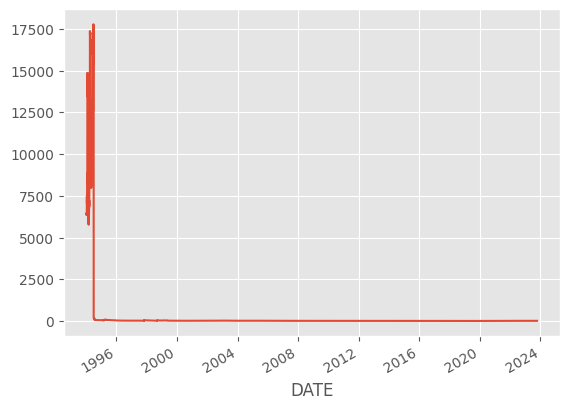

In [ ]:
# Cria um gráfico usando a coluna VALUE ((% a.a.))
df_serie94["VALUE ((% a.a.))"].plot();

## Utilizando Média Movel Simples para 12 periodos (12 meses)

A média móvel é calculada em uma janela deslizante de 12 meses, tornando mais fácil observar tendências de médio prazo e reduzindo o impacto de flutuações de curto prazo.

<Axes: xlabel='DATE'>

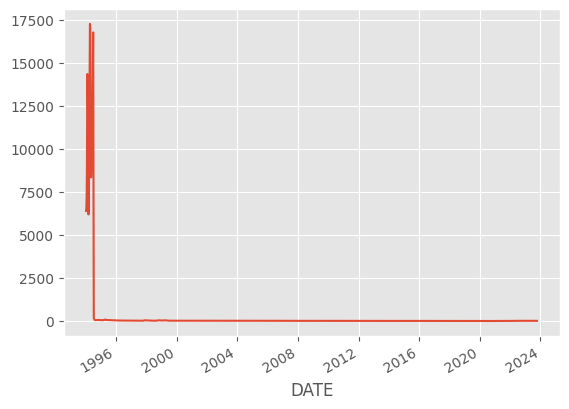

In [ ]:
# Calcula a média móvel (rolling mean) de 12 meses  --> série temporal suavizada
df_serie94["VALUE ((% a.a.))"].rolling(12).mean()

# gráfico da média móvel
df_serie94["VALUE ((% a.a.))"].rolling(12).mean().plot()

## Verificar sazonalidade e tendência

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


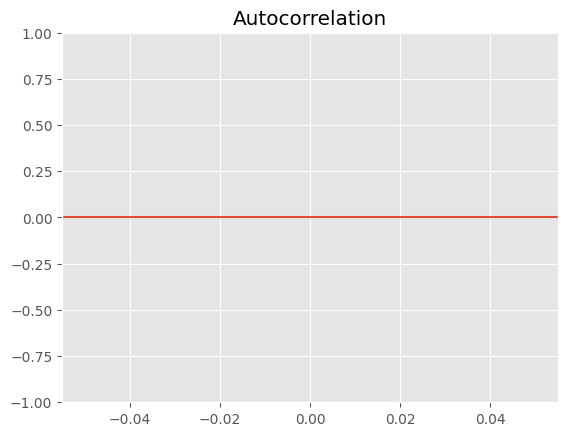

In [ ]:
# Gráfico de autocorrelação

sm.graphics.tsa.plot_acf(df_serie94["VALUE ((% a.a.))"], lags=5)
plt.show()

## Referência para o teste ADF:

https://biangomes.medium.com/s%C3%A9rie-estacion%C3%A1ria-com-dickley-fuller-85cb1d501631

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Realiza o teste ADF para verificar se a série é estacionária
result = adfuller(df_serie94["VALUE ((% a.a.))"].values)
adf_statistic = result[0]
p_value = result[1]

# Imprime o resultado
print("\nresult", result)
print("Estatística ADF:", adf_statistic)
print("Valor p:", p_value)


MissingDataError: ignored